In [123]:
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
import json
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [124]:
def read_data(file_name_json):
  '''
  file_name_json - path of json files for videos
  file_name_text -  path of text file where the key-point values are to stored
  '''
  test = []
  j=0
  json_files = glob.glob(file_name_json)
  #print(len(json_files))
  limit = len(json_files)-(len(json_files)%10)
  for jfile in json_files:
    if j < limit:
      j = j + 1
      with open(jfile) as f:
        data = json.load(f)
        if data['people']:
          kp= data['people'][0]['pose_keypoints_2d']
          kp = [kp[i] for i in range(0, 74) if (i+1) % 3 != 0]
          test.append(kp)
  x = int(len(test)/10)
  X_predict = np.asarray(test)
  print(X_predict.shape)
  #answer = X_predict.shape[0] - X_predict.shape[0]%10
  ans = X_predict.shape[0]%10
  #print(ans)
  if X_predict.shape[0]%10 != 0:
    X_predict = X_predict[:-ans, :]
  print(X_predict.shape)
  test = test[: len(test) - ans]
  #print(len(test))
  X_predict = X_predict.reshape(x, 10, 50)
  return X_predict, len(test)

In [145]:
##LOAD THE SAVED MODEL##
model = keras.models.load_model('/content/drive/My Drive/CSCE636/Model/Submission5/model_submit5_final.hdf5')

In [146]:
#PREDICT THE MODEL#
def predict(file_name_json):
  X_predict, num_frames = read_data2(file_name_json)
  ypre = model.predict(X_predict)
  #print(ypre.shape)
  ypre=ypre.flatten()
  df = pd.DataFrame(ypre) 
  rolling = df.rolling(window=10)
  rolling_mean = rolling.mean()
  fps = 30
  #print(num_frames)
  #num_frames = X_predict.shape[0]
  x = np.linspace(0,num_frames/fps,num_frames)
  plt.figure(1)
  #print(len(ypre))
  plt.plot(x, ypre)
  plt.axhline(y=0.5, color='r', linestyle='-')
  plt.ylabel('label')
  plt.xlabel('time in seconds')
  plt.legend(['Actual predicted data'], loc='best' )
  plt.ylim([0,1.2])
  plt.title('Prediction Output For Sample Videos')
  plt.show()

(160, 50)
(160, 50)


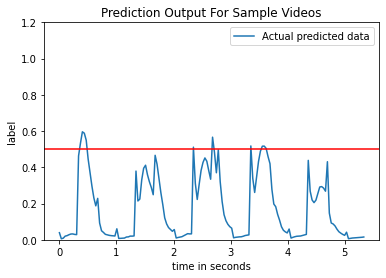

In [147]:
file_name_json = '/content/drive/My Drive/CSCE636/JSON_Output/71/*'  #change json file for different test videos
predict2(file_name_json)

(180, 50)
(180, 50)


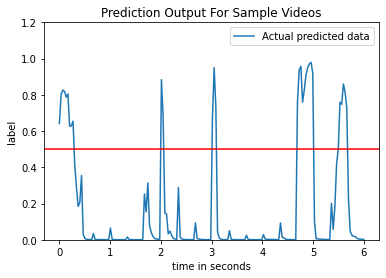

In [148]:
file_name_json = '/content/drive/My Drive/CSCE636/Test_Submission4/Trial1/*'  #change json file for different test videos
predict(file_name_json)

(180, 50)
(180, 50)


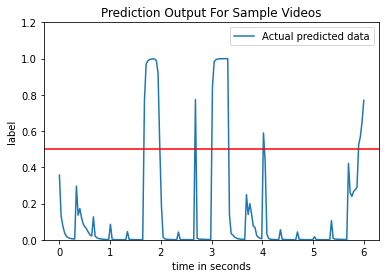

In [149]:
file_name_json = '/content/drive/My Drive/CSCE636/Test_Submission4/Trial2/*'  #change json file for different test videos
predict(file_name_json)

(210, 50)
(210, 50)


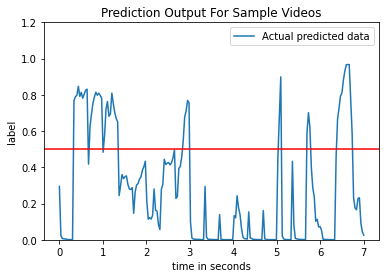

In [150]:
file_name_json = '/content/drive/My Drive/CSCE636/Test_Submission4/Trial3/*'  #change json file for different test videos
predict(file_name_json)

(210, 50)
(210, 50)


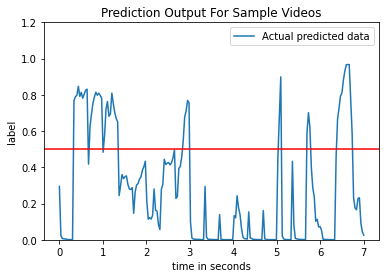

In [151]:
file_name_json = '/content/drive/My Drive/CSCE636/Test_Submission4/Trial3/*'  #change json file for different test videos
predict2(file_name_json)

(144, 50)
(140, 50)


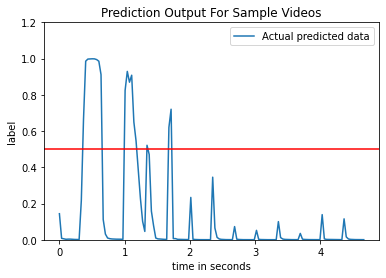

In [152]:
file_name_json = '/content/drive/My Drive/CSCE636/Test_Submission4/Trial4/*'  #change json file for different test videos
predict2(file_name_json)

(178, 50)
(170, 50)


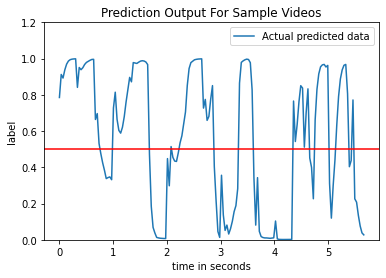

In [153]:
file_name_json = '/content/drive/My Drive/CSCE636/Test_Submission4/Trial5/*'  #change json file for different test videos
predict2(file_name_json)

(210, 50)
(210, 50)


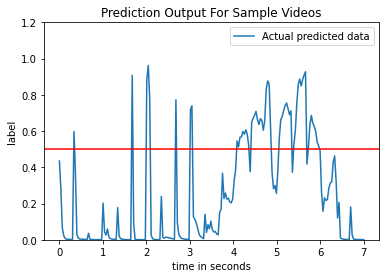

In [154]:
file_name_json = '/content/drive/My Drive/CSCE636/Test_Submission4/Trial6/*'  #change json file for different test videos
predict2(file_name_json)

(210, 50)
(210, 50)


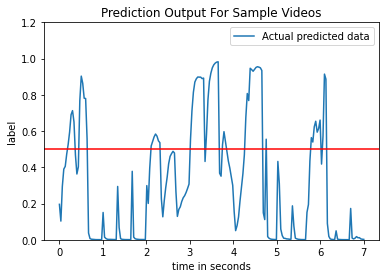

In [155]:
file_name_json = '/content/drive/My Drive/CSCE636/Test_Submission4/Trial7/*'  #change json file for different test videos
predict2(file_name_json)

(236, 50)
(230, 50)


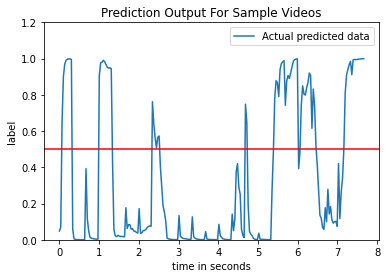

In [156]:
file_name_json = '/content/drive/My Drive/CSCE636/Test_Submission4/Trial8/*'  #change json file for different test videos
predict2(file_name_json)

(210, 50)
(210, 50)


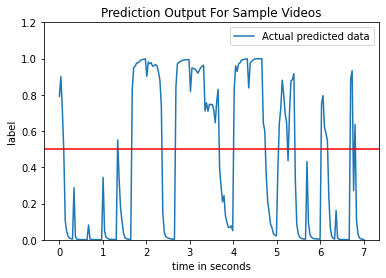

In [157]:
file_name_json = '/content/drive/My Drive/CSCE636/Test_Submission4/Trial9/*'  #change json file for different test videos
predict2(file_name_json)

(200, 50)
(200, 50)


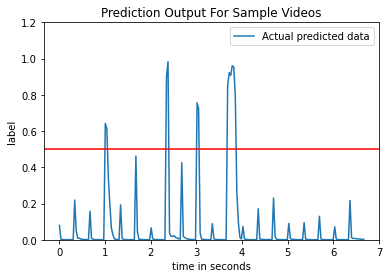

In [158]:
file_name_json = '/content/drive/My Drive/CSCE636/Test_Submission4/Trial10/*'  #change json file for different test videos
predict2(file_name_json)

(150, 50)
(150, 50)


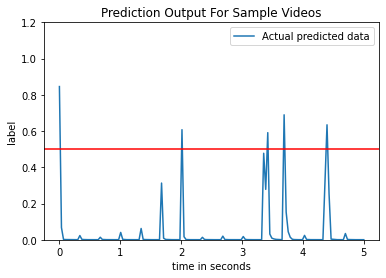

In [159]:
file_name_json = '/content/drive/My Drive/CSCE636/Test_Submission4/Trial11/*'  #change json file for different test videos
predict2(file_name_json)

(175, 50)
(170, 50)


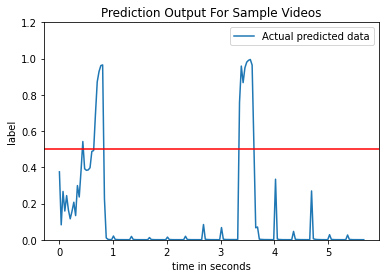

In [160]:
file_name_json = '/content/drive/My Drive/CSCE636/Test_Submission4/Trial12/*'  #change json file for different test videos
predict2(file_name_json)